# Image Filtering


In [26]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage.morphology import square
from skimage import io, data, img_as_ubyte, img_as_float
from skimage.filters import gaussian, laplace, rank
from skimage.restoration import denoise_bilateral, denoise_nl_means, estimate_sigma



## 1. Noise Zoom

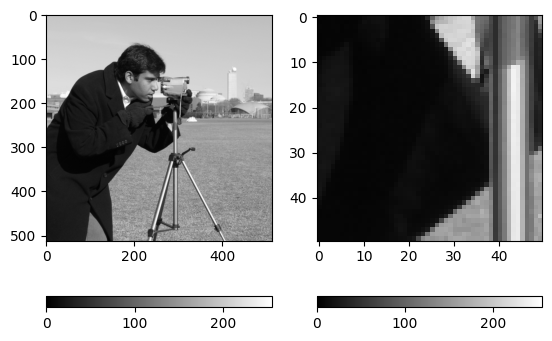

In [27]:
img = data.camera()
imn = img[250:300, 250:300]

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(img, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(imn, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)


## 2. Noise - s&p

uint8 0 255
float64 0.0 1.0


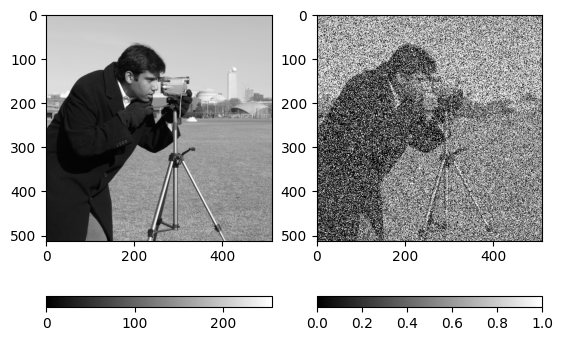

In [28]:
img = data.camera()
rng = np.random.default_rng(seed=42)
imn = random_noise(img, mode='s&p', amount=0.5, salt_vs_pepper=0.5, rng=rng)
print(img.dtype, img.min(), img.max())
print(imn.dtype, imn.min(), imn.max())

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(img, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(imn, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 1)


## 3. Noise - gaussian

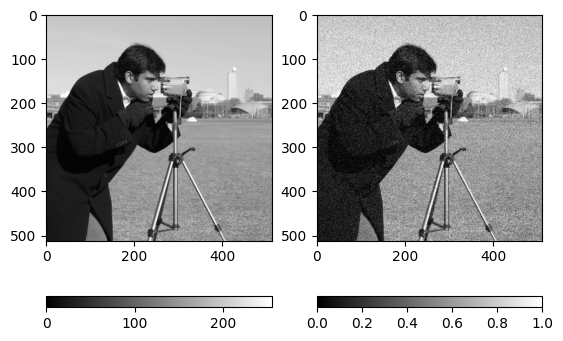

In [29]:
img = data.camera()
imn = random_noise(img, mode='gaussian')

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(img, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(imn, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 1)

## 4. Mean - Gaussian

C:\Users\fauzi\AppData\Local\Temp\ipykernel_28128\2582026435.py:5: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  se = square(3)
C:\Users\fauzi\AppData\Local\Temp\ipykernel_28128\2582026435.py:7: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  se = square(5)


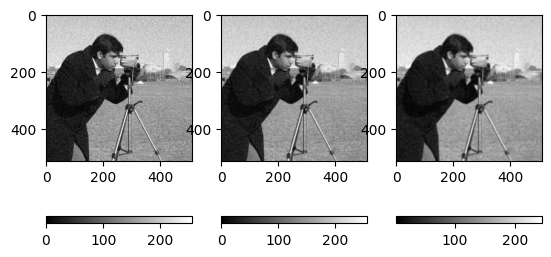

In [ ]:
img = data.camera()
imn = random_noise(img, mode='gaussian')
imn = img_as_ubyte(imn)

se = square(3)
imm3 = rank.mean(imn, footprint=se)
se = square(5)
imm5 = rank.mean(imn, footprint=se)

fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
p = plt.imshow(imn, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 3, 2)
p = plt.imshow(imm3, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 3, 3)
p = plt.imshow(imm5, cmap='gray')
c = plt.colorbar(orientation='horizontal')

## 5. Mean - Gaussian & SP

C:\Users\fauzi\AppData\Local\Temp\ipykernel_28128\3880522611.py:10: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  se = square(3)
C:\Users\fauzi\AppData\Local\Temp\ipykernel_28128\3880522611.py:12: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  se = square(5)


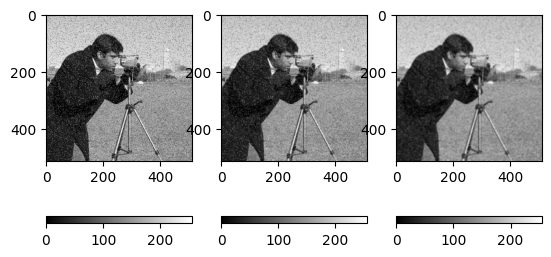

In [36]:
img = data.camera()
#print(img.dtype, img.min(), imn.max())
rng = np.random.default_rng(seed=42)
imn = random_noise(img, mode='s&p', amount=0.1, salt_vs_pepper=0.5, rng=rng)
# everytime random noise gives float64 between 0 and 1
#print(imn.dtype, imn.min(), imn.max())
imn = img_as_ubyte(imn)
#print(imn.dtype, imn.min(), imn.max())

se = square(3)
imm3 = rank.mean(imn, footprint=se)
se = square(5)
imm5 = rank.mean(imn, footprint=se)

fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
p = plt.imshow(imn, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 3, 2)
p = plt.imshow(imm3, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 3, 3)
p = plt.imshow(imm5, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)


## 6. Median - Gaussian & SP

C:\Users\fauzi\AppData\Local\Temp\ipykernel_28128\3296422739.py:6: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  se = square(3)
C:\Users\fauzi\AppData\Local\Temp\ipykernel_28128\3296422739.py:8: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  se = square(5)


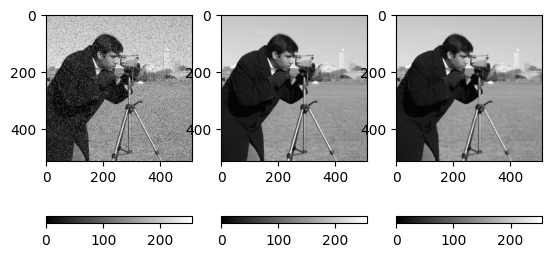

In [40]:
img = data.camera()
rng = np.random.default_rng(seed=42)
imn = random_noise(img, mode='s&p', amount=0.1, salt_vs_pepper=0.5, rng=rng)
imn = img_as_ubyte(imn)

se = square(3)
imm3 = rank.median(imn, footprint=se)
se = square(5)
imm5 = rank.median(imn, footprint=se)

fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
p = plt.imshow(imn, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 3, 2)
p = plt.imshow(imm3, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 3, 3)
p = plt.imshow(imm5, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)



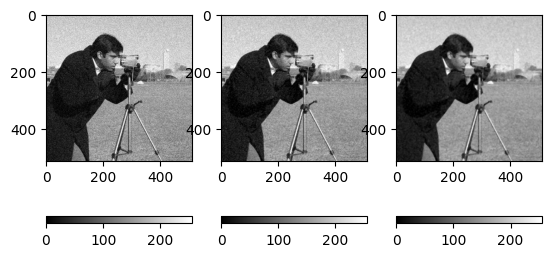

In [49]:
from skimage.morphology import footprint_rectangle

img = data.camera()
imn = random_noise(img, mode='gaussian', mean=0, var=0.01)
imn = img_as_ubyte(imn)

#se = square(3)
#square module will be removed in version 0.27
se = footprint_rectangle((3, 3))
imm3 = rank.median(imn, footprint=se)
se1 = footprint_rectangle((5, 5))
imm5 = rank.median(imn, footprint=se1)

fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
p = plt.imshow(imn, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 3, 2)
p = plt.imshow(imm3, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 3, 3)
p = plt.imshow(imm5, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)



## 7. Gaussian


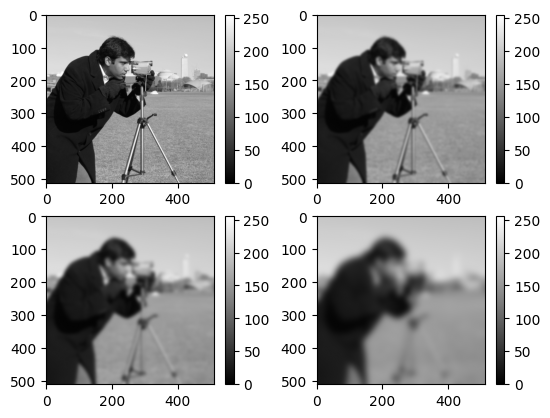

In [52]:
img = data.camera()
img3 = gaussian(img, sigma=3)
img5 = gaussian(img, sigma=5)
img10 = gaussian(img, sigma=10)

img3 = img_as_ubyte(img3)
img5 = img_as_ubyte(img5)
img10 = img_as_ubyte(img10)

fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
p = plt.imshow(img, cmap='gray')
c = plt.colorbar(orientation='vertical')
plt.clim(0, 255)

ax = fig.add_subplot(2, 2, 2)
p = plt.imshow(img3, cmap='gray')
c = plt.colorbar(orientation='vertical')
plt.clim(0, 255)

ax = fig.add_subplot(2, 2, 3)
p = plt.imshow(img5, cmap='gray')
c = plt.colorbar(orientation='vertical')
plt.clim(0, 255)

ax = fig.add_subplot(2, 2, 4)
p = plt.imshow(img10, cmap='gray')
c = plt.colorbar(orientation='vertical')
plt.clim(0, 255)



## 8. Laplacian

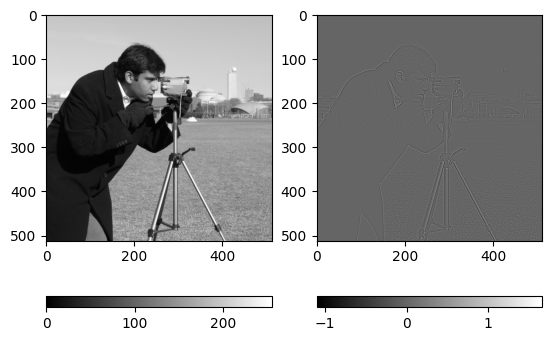

In [53]:
img = data.camera()
imf = laplace(img, ksize=3)

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(img, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(imf, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(imf.min(), imf.max())

## 9. Bilateral

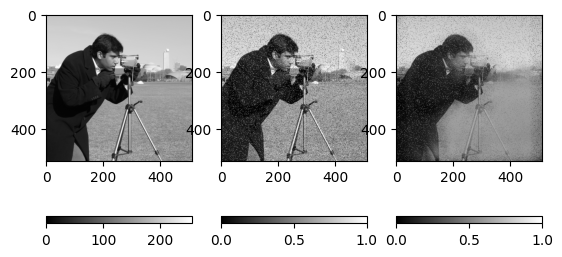

In [55]:
img = data.camera()
rng = np.random.default_rng(seed=42)
imn = random_noise(img, mode='s&p', amount=0.1, rng=rng)
imf = denoise_bilateral(imn, sigma_spatial=15)

fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
p = plt.imshow(img, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 3, 2)
p = plt.imshow(imn, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 1)

ax = fig.add_subplot(1, 3, 3)
p = plt.imshow(imf, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 1)

## 10. Non-local Means

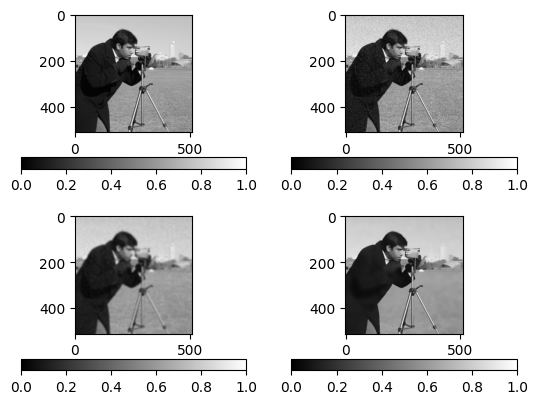

In [58]:
img = img_as_float(data.camera())
rng = np.random.default_rng(seed=42)
imn = random_noise(img, mode='gaussian', var=0.01, rng=rng)
imf = gaussian(imn, sigma=3)

sigma_est = np.mean(estimate_sigma(imn, channel_axis=None))
imd = denoise_nl_means(imn, h=0.6*sigma_est, sigma=sigma_est, fast_mode=True)

fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
p = plt.imshow(img, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 1)

ax = fig.add_subplot(2, 2, 2)
p = plt.imshow(imn, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 1)

ax = fig.add_subplot(2, 2, 3)
p = plt.imshow(imf, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 1)

ax = fig.add_subplot(2, 2, 4)
p = plt.imshow(imd, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 1)

